In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
df = pd.read_csv('flight-price-prediction/flight_price_processed.csv')
df.head()

,Stops,Class,Duration,Days Left,Price,Airline_Air_India,Airline_GO_FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,...,Departure Time_Early_Morning,Departure Time_Evening,Departure Time_Late_Night,Departure Time_Morning,Departure Time_Night,Arrival Time_Early_Morning,Arrival Time_Evening,Arrival Time_Late_Night,Arrival Time_Morning,Arrival Time_Night
0,0,0,-1.397994,-1.843875,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,-1.374820,-1.843875,5953,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,-1.397994,-1.843875,5956,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,-1.386407,-1.843875,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,-1.374820,-1.843875,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# Split the data into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the neural network model
model = Sequential()

In [10]:
# Input Layer & Hidden Layer 1
# units=64: The number of "neurons" in this layer
# activation='relu': The math function that decides if a neuron fires (Standard for modern NNs)
# input_dim=X_train.shape[1]: Tells the network how many features to expect (29 in your case)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden Layer 2
model.add(Dense(units=32, activation='relu'))

# Hidden Layer 3
model.add(Dense(units=16, activation='relu'))

# Output Layer
# units=1: We want 1 single number output (the Price)
# activation='linear': We want the raw number (no transformation)
model.add(Dense(units=1, activation='linear'))

c:\Users\Brandon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the Model
# optimizer='adam': The algorithm that updates the weights (Adaptive Moment Estimation)
# loss='mean_squared_error': The metric the model tries to minimize
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Define Early Stopping
# This stops training automatically if the model stops improving, preventing overfitting.
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
# Train the Model
print("Training Neural Network...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,          # Maximum number of passes through the data
    batch_size=32,      # How many rows to process before updating weights
    callbacks=[early_stop],
    verbose=1
)

Training Neural Network...
Epoch 1/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 8s 908us/step - loss: 98374232.0000 - val_loss: 32586380.0000
Epoch 2/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 7s 911us/step - loss: 30376506.0000 - val_loss: 30307174.0000
Epoch 3/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 7s 933us/step - loss: 28424788.0000 - val_loss: 28251882.0000
Epoch 4/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 7s 890us/step - loss: 26651444.0000 - val_loss: 27282032.0000
Epoch 5/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 7s 906us/step - loss: 24950138.0000 - val_loss: 24823084.0000
Epoch 6/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 7s 876us/step - loss: 23586428.0000 - val_loss: 23773194.0000
Epoch 7/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 7s 888us/step - loss: 22127738.0000 - val_loss: 22013702.0000
Epoch 8/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 7s 867us/step - loss: 21024410.0000 - val_loss: 21223446.0000
Epoch 9/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 7s 871us/step - loss: 20414506.0000 - val_loss: 20933892.0000
Epoch 10/50
7504/7504 ━━━━━━━━━━━━━━━

In [14]:
# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"\nFinal R-squared Score: {r2:.4f}")

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step

Final R-squared Score: 0.9681


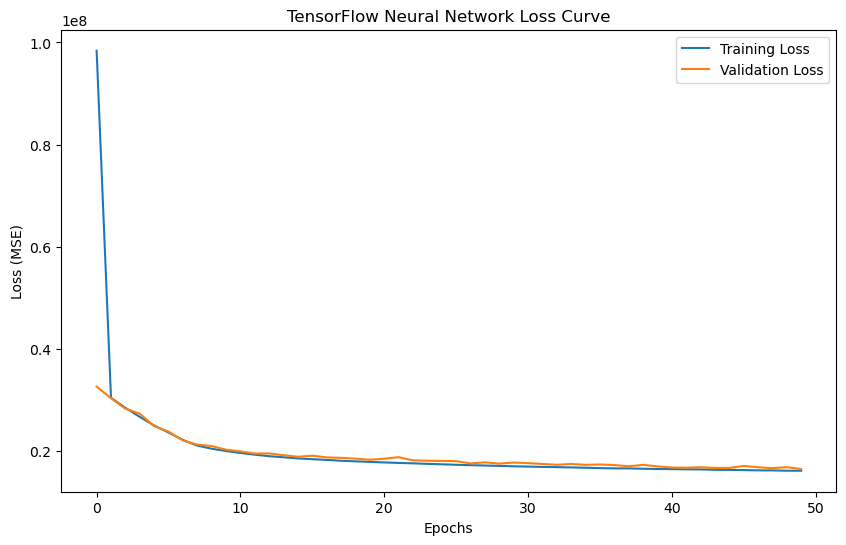

In [15]:
# Plot the Loss Curve (Crucial for NNs)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('TensorFlow Neural Network Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()